# 5.1 Recurrent Neural Networks

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [1]:
%matplotlib inline

Recurrent Neural Networks (RNN) are a family of neural networks designed to process sequential data. This type of networks are specially suitable for problems where every sample is a sequence of objects (values) with statistical dependence among them.

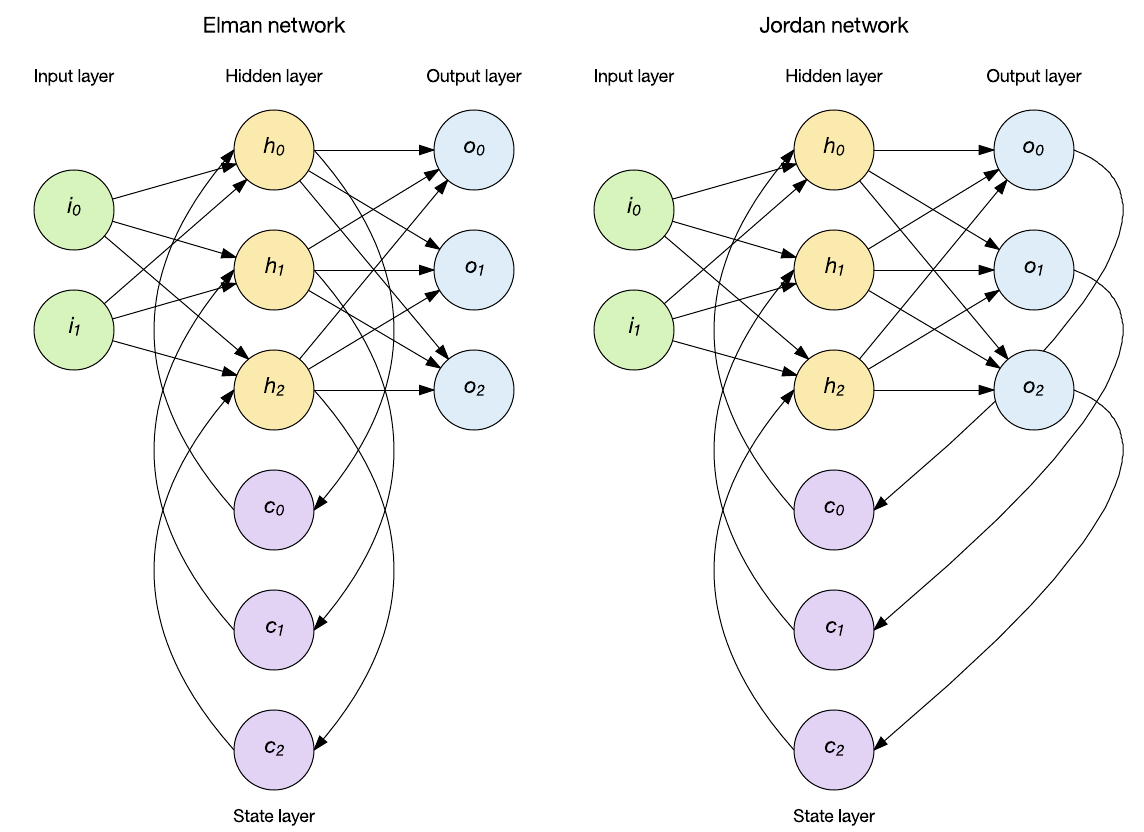

In [14]:
from IPython.display import Image
Image(filename='local/imgs/RNN2.png', width=700)

RNNs can be designed to solve different learning paradigms, in other words, they are able to adapt to different data configurations.

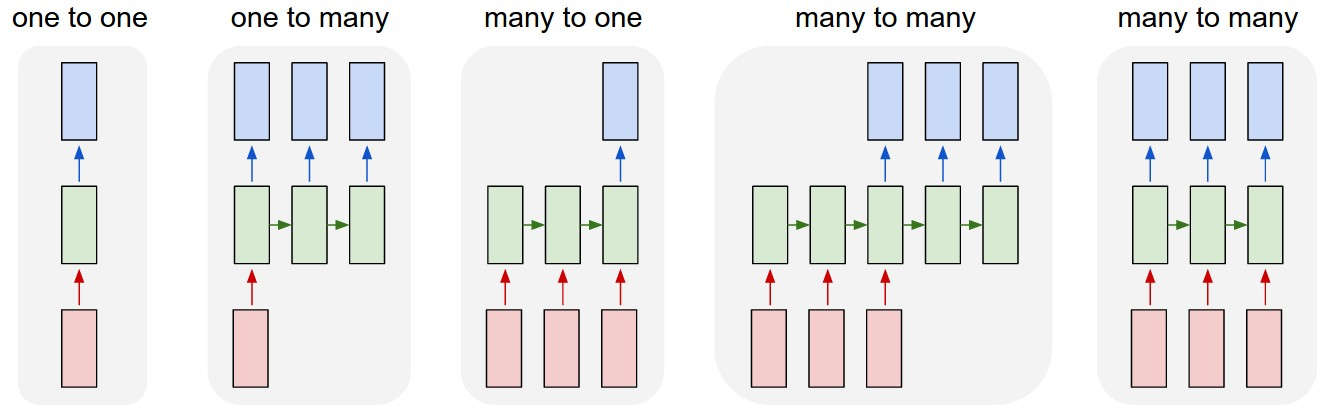

In [10]:
Image(filename='local/imgs/RNN-Topol.jpeg', width=1200)

Image taken from <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Andrej Karpathy</a>

Examples:

- 1. Conventional MLP
- 2. Caption generation
- 3. Sentiment analysis
- 4. Language translation
- 5. Named Entity Recognition or Part Of Speech Tagging


## Lets do some examples of Time series using conventional MLPs

First we need some data:

In [2]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed, LSTM
from tensorflow import keras
from local.lib import DataPreparationRNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from local.lib.DataPreparationRNN import split_sequence
from sklearn.preprocessing import MinMaxScaler
look_back=1
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = datasetO.values
dataset = dataset.astype('float32')

For simplicity we are going to split the data manualy into training and validation sets using the classical approach 

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)

#tensor formating
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
print('Train',X_train[:10])
print('Test',y_train[:10])

Train [[[0.02588999]]

 [[0.04530746]]

 [[0.09061491]]

 [[0.08090615]]

 [[0.05501619]]

 [[0.10032365]]

 [[0.14239484]]

 [[0.14239484]]

 [[0.10355988]]

 [[0.04854369]]]
Test [[0.04530746]
 [0.09061491]
 [0.08090615]
 [0.05501619]
 [0.10032365]
 [0.14239484]
 [0.14239484]
 [0.10355988]
 [0.04854369]
 [0.        ]]


Let's create the MLP.

In [7]:
#keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(5,activation = 'relu',input_dim=look_back))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Train Score: 22.91 RMSE
Test Score: 48.53 RMSE
Train Score: 8.54 MAPE
Test Score: 9.76 MAPE
1


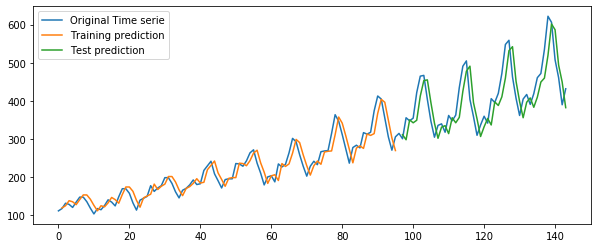

In [8]:
model1.compile(optimizer='adam',loss='mse')
model1.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE(model1,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

### Using three steps backward to predict one step ahead:

Train Score: 25.37 RMSE
Test Score: 55.77 RMSE
Train Score: 9.09 MAPE
Test Score: 11.03 MAPE
1


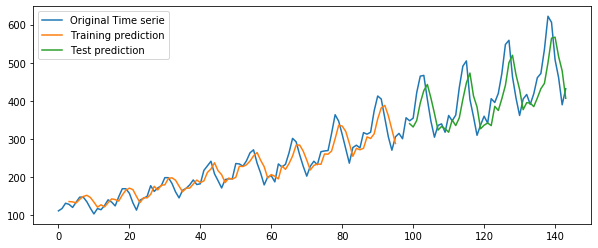

In [10]:
look_back = 3;
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)

#Model
model3 = Sequential()
model3.add(Dense(5,activation = 'relu',input_dim=look_back))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')
model3.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)

#Validation
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE(model3,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

Train Score: 0.31 RMSE
Test Score: 0.35 RMSE
Train Score: 0.71 MAPE
Test Score: 0.61 MAPE
1


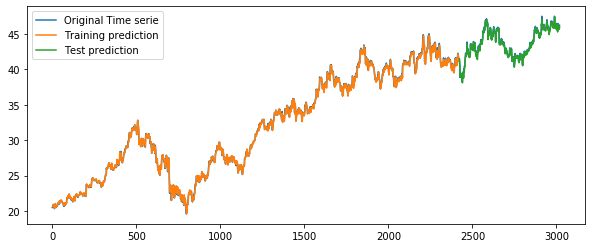

In [30]:
look_back=3
dataset1 = pd.read_csv('local/data/KO_2006-01-01_to_2018-01-01.csv', usecols=['High'])
dataset1[np.isnan(dataset1)] = dataset1['High'].max()
dataset = dataset1.values
dataset = dataset.astype('float32')

# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
#------------------------------------------------------------------
keras.backend.clear_session()
model3b = Sequential()
model3b.add(Dense(30,activation = 'relu',input_dim=look_back))
model3b.add(Dense(1))
model3b.compile(optimizer='adam',loss='mse')
model3b.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=50, verbose=0)

trainPredict, testPredict = DataPreparationRNN.EstimaRMSE(model3b,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

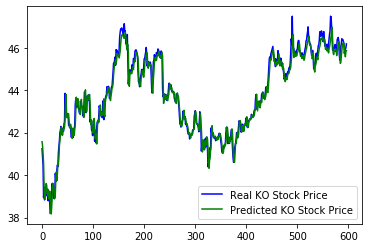

In [82]:
plt.plot(scaler.inverse_transform(y_test),'b',label='Real KO Stock Price')
plt.plot(testPredict,'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

There are also problems with basic MLP when we have multiple time series to forecast one of them (**Multiple Input series**), or multiple time series to predict  all of them (**Multiple parallel series**)

### Let's define formaly the Recurrent Neural Networks

An alternative view of the network 

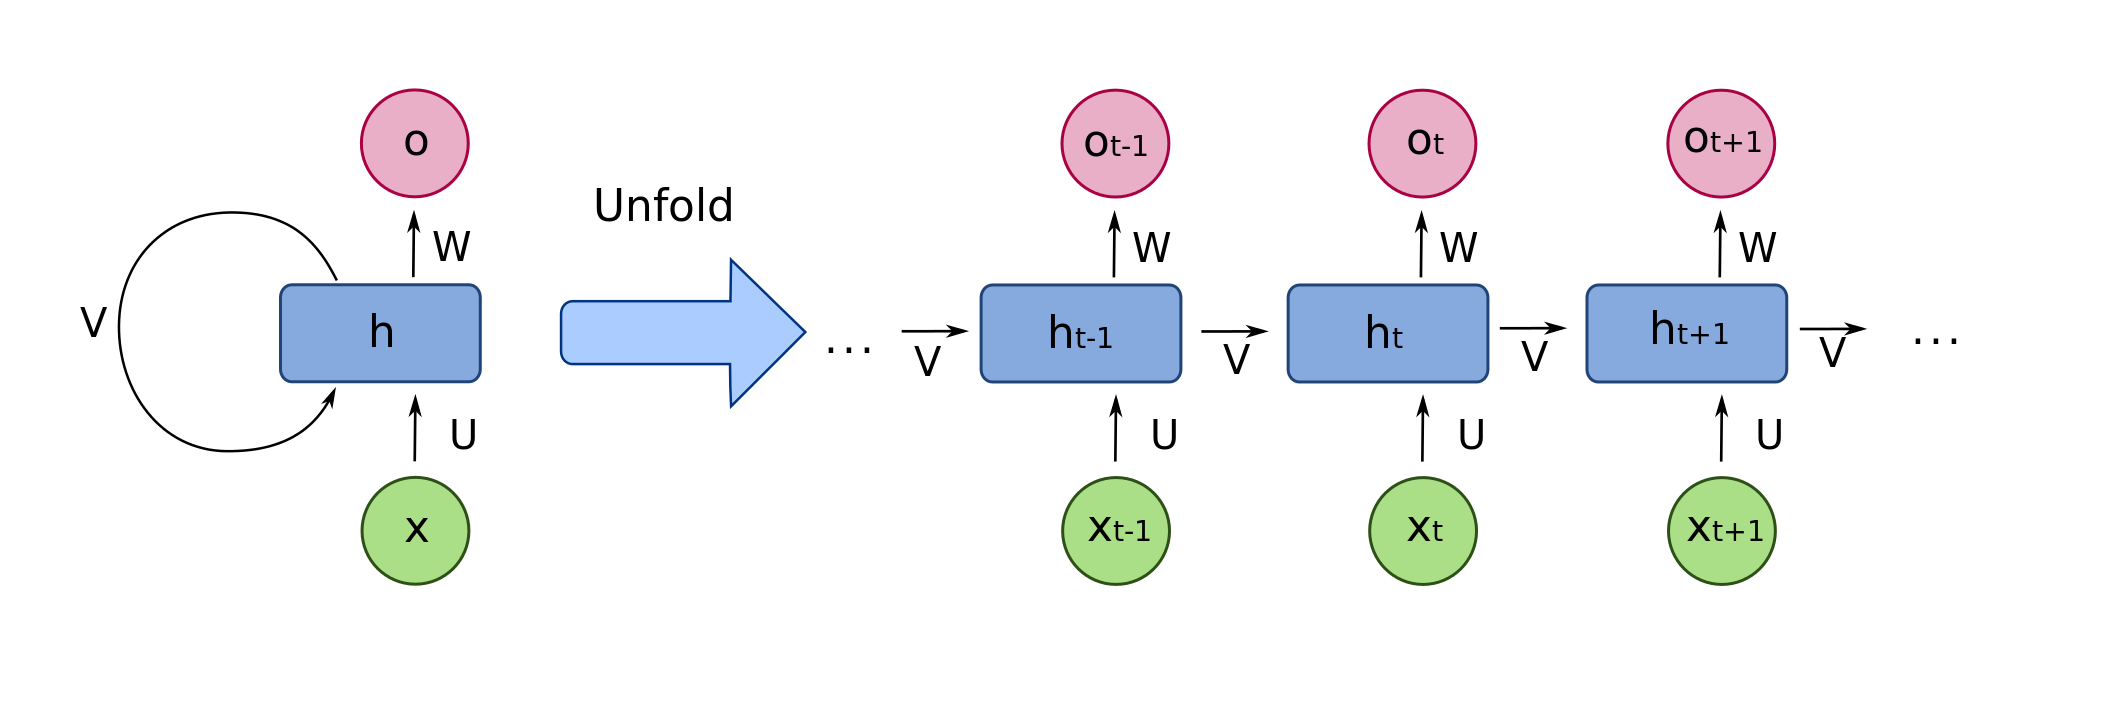

In [19]:
from IPython.display import Image
Image(filename='local/imgs/RNN3.png', width=1200)

According to the notation in the in the former Figure, the mathematical formulation of an Elman RNN with one hidden layer and one output layer is given by:

$${\bf{a}}^{(t)} = {\bf{b}} + {\bf{V}}{\bf{h}}^{(t-1)} + {\bf{U}}{\bf{x}}^{(t)},\\ {\bf{h}}^{(t)} = \tanh({\bf{a}}^{(t)}), \\ {\bf{o}}^{(t)} = {\bf{c}} + {\bf{W}}{\bf{h}}^{(t)}$$

where $\bf{V}$ is the weights matrix of the feedback loop. $\bf{U}$ is the  weights matrix of the inputs and $\bf{W}$ is the weights matrix that contects the **state** of the network with the output layer. $\bf{b}$ and $\bf{c}$ are the bias vectors for the hidden and output layers respectively. The ouput of the network ${\bf{y}}^{(t)}$ corresponds to the application of the activation function to the values ${\bf{o}}^{(t)}$.

### Backpropagation through time (BPTT)

The first step for training a RNN is to define the loss function. Let's consider a sequence of length $\tau$, the loss for that single sequence can be expressed as: 

$$L(\{ {\bf{y}}^{(1)},{\bf{y}}^{(2)},\cdots,{\bf{y}}^{(\tau)} \}, \{ {\bf{\hat{y}}}^{(1)},{\bf{\hat{y}}}^{(2)},\cdots,{\bf{\hat{y}}}^{(\tau)} \}) \\
L = \sum_t L^{(t)}$$

If for instance the loss function for output $i$ is $L^{(t)} = -\log \hat{y}_i^{(t)}$, then

$$(\nabla_{{\bf{o}}^{(t)}}L)_i = \frac{\partial L}{\partial o_i^{(t)}} = \frac{\partial L}{\partial L^{(t)}} \frac{\partial L^{(t)}}{\partial \hat{y}_i^{(t)}} \frac{\partial \hat{y}_i^{(t)}}{\partial o_i^{(t)}} = \hat{y}_i^{(t)} - 1 \\ \nabla_{{\bf{o}}^{(t)}}L = {\bf{y}}^{(t)} \odot ({\bf{\hat{y}}}^{(t)} - {\bf{1}} )$$

where $\odot$ is the Hadamard product. When $t=\tau$, ${\bf{h}}^{(\tau)}$ only has ${\bf{o}}^{(\tau)}$ as descendent, so its gradient is simple:

$$ \nabla_{{\bf{h}}^{(\tau)}} L = {\bf{W}}^T\nabla_{{\bf{o}}^{(\tau)}}L$$

From this two results we can iterate backward in time to back-propagate gradients through time. From $t=\tau-1$ down to $\tau = 1$, ${\bf{h}}^{(t)}$ has two descendents: ${\bf{h}}^{(t+1)}$ and ${\bf{o}}^{(t)}$, therefore its gradient is given by:   

$$ \nabla_{{\bf{h}}^{(t)}}L = \left( \frac{\partial {\bf{h}}^{(t+1)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{h}}^{(t+1)}} L) + \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{o}}^{(t)}}L) \\
\nabla_{{\bf{h}}^{(t)}}L = {\bf{V}}^T\text{diag} \left( 1 - \left( {\bf{h}}^{(t+1)} \right)^2\right)(\nabla_{{\bf{h}}^{(t+1)}} L) + {\bf{W}}^T(\nabla_{{\bf{o}}^{(t)}}L)$$

Based on the former results, the rest of the gradients can be calculated as:

$$ \nabla_{\bf{c}} L = \sum_t \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{c}}}\right)^T \nabla_{{\bf{o}}^{(t)}}L$$

$$ \nabla_{\bf{b}} L = \sum_t \left(\frac{\partial {\bf{h}}^{(t)}}{\partial {\bf{b}}}\right)^T \nabla_{{\bf{h}}^{(t)}}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)\nabla_{{\bf{h}}^{(t)}} L $$

$$\nabla_{{\bf W}}L = \sum_t \sum_i \left(  \frac{\partial L}{\partial o_i^{(t)}} \right)^T \nabla_{{\bf W}} o_i^{(t)} = \sum_t (\nabla_{{\bf{o}}^{(t)}}L){\bf{h}}^{(t)^T}$$

$$\nabla_{\bf V}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{h}}^{(t-1)^T}$$

$$ \nabla_{\bf U}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{x}}^{(t)^T} $$

## Now using a RNN layer instead of a Dense layer:

Input data must have the following structure: **[n_samples,n_times,n_features]**

Input: **[n_samples,1,1]**

In [15]:
look_back = 1;
dataset = datasetO.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)

Train Score: 22.87 RMSE
Test Score: 49.03 RMSE
Train Score: 8.54 MAPE
Test Score: 9.80 MAPE
1


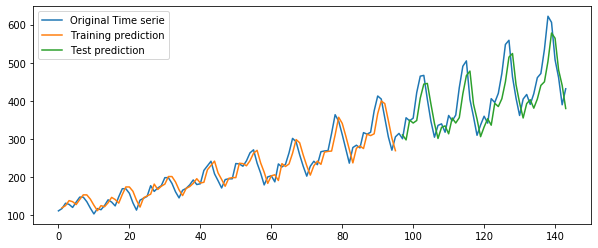

In [16]:
model4 = Sequential()
model4.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4.add(Dense(1))
model4.compile(optimizer='adam',loss='mse')
model4.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model4,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [17]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Using multiple times as features

Input: **[n_samples,1,2]**

Train Score: 22.88 RMSE
Test Score: 49.09 RMSE
Train Score: 8.59 MAPE
Test Score: 9.87 MAPE
1


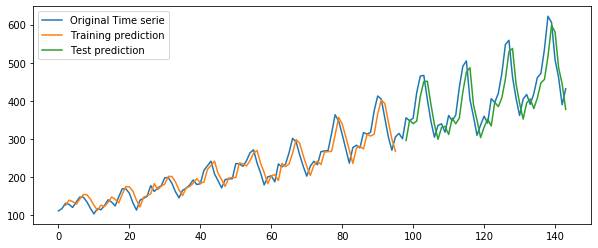

In [15]:
look_back = 2;
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)
#-----------------------------------------------------------------
model4b = Sequential()
model4b.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4b.add(Dense(1))
#-------------------------------------------------------------------

model4b.compile(optimizer='adam',loss='mse')
model4b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model4b,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [34]:
model4b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 5)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


Using multiple times instead of multiple features:

### Using multiple times as multiple times!

Input: **[n_samples,2,1]**

Train Score: 21.17 RMSE
Test Score: 51.46 RMSE
Train Score: 8.26 MAPE
Test Score: 9.29 MAPE
1


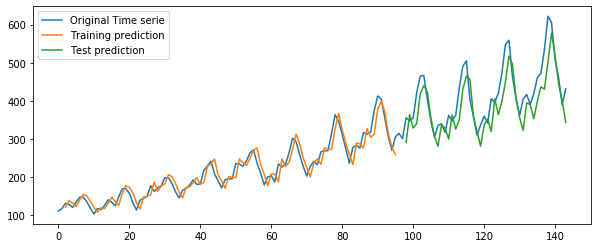

In [16]:
n_steps = 2;
X_train, y_train = DataPreparationRNN.create_dataset(trainN, n_steps)
X_test, y_test = DataPreparationRNN.create_dataset(testN, n_steps)
#---------------------------------------------------------------------
model6 = Sequential()
model6.add(SimpleRNN(5,activation = 'relu',input_shape=(n_steps,1)))
model6.add(Dense(1))
#---------------------------------------------------------------------
model6.compile(optimizer='adam',loss='mse')
model6.fit(X_train.reshape(X_train.shape[0],n_steps,1),y_train.flatten(),epochs=500, verbose=0)
#-----------------------------------------------------------------------------------------------------
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model6,X_train,X_test,y_train,y_test,scaler,1,n_steps)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,n_steps)

In [32]:
model6.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Train Score: 0.31 RMSE
Test Score: 0.35 RMSE
Train Score: 0.70 MAPE
Test Score: 0.59 MAPE
1


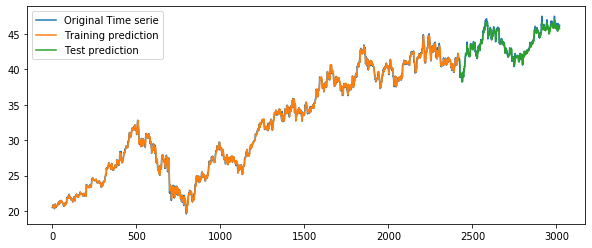

In [83]:
n_steps = 3;
dataset = dataset1.values
dataset = dataset.astype('float32')

# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, n_steps)
X_test, y_test = DataPreparationRNN.create_dataset(testN, n_steps)
#---------------------------------------------------------------------
model6 = Sequential()
model6.add(SimpleRNN(30,activation = 'relu',input_shape=(n_steps,1)))
model6.add(Dense(1))
model6.compile(optimizer='adam',loss='mse')
#-----------------------------------------------------------------------
model6.fit(X_train.reshape(X_train.shape[0],n_steps,1),y_train.flatten(),verbose=0,epochs=50,batch_size=32)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model6,X_train,X_test,y_train,y_test,scaler,1,n_steps)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,n_steps)

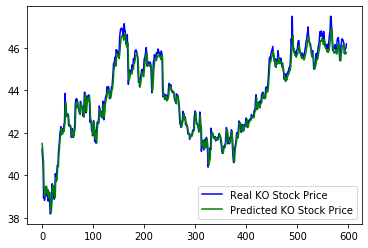

In [84]:
plt.plot(scaler.inverse_transform(y_test[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

## Lets make more complex architectures
### Two recurrent layers:

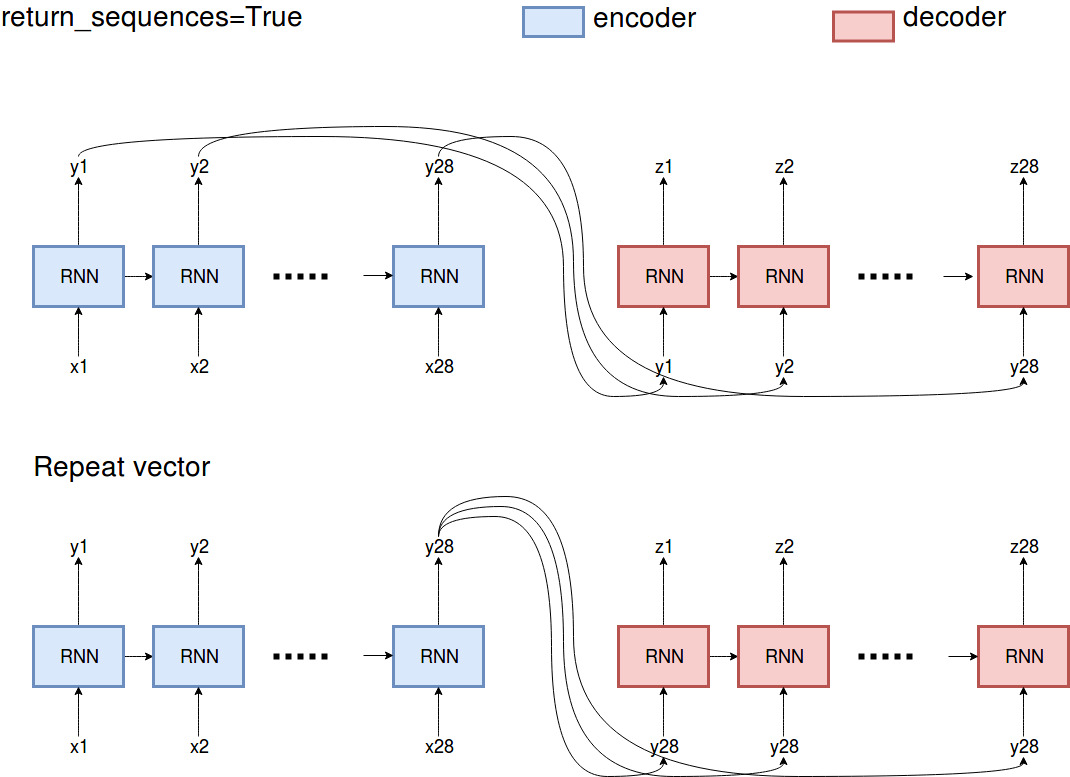

In [38]:
Image(filename='local/imgs/ReturnSeq.jpg', width=800)

Input: **[n_samples,1,1]**

**Option1**: Propagate the first layer and provide every output of the first layer to the following layer:

In [17]:
look_back = 2;
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)

Train Score: 22.11 RMSE
Test Score: 48.18 RMSE
Train Score: 8.56 MAPE
Test Score: 9.41 MAPE
1


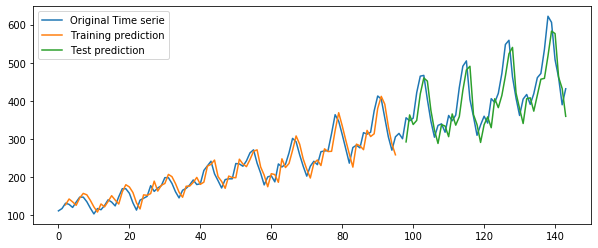

In [18]:
model5b = Sequential()
model5b.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(1,look_back)))
model5b.add(SimpleRNN(5,activation = 'relu'))
model5b.add(Dense(1))
#-----------------------------------------------------------------------------------------------
model5b.compile(optimizer='adam',loss='mse')
model5b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5b,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [67]:
model5b.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_27 (SimpleRNN)    (None, 1, 5)              40        
_________________________________________________________________
simple_rnn_28 (SimpleRNN)    (None, 5)                 55        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Train Score: 0.32 RMSE
Test Score: 0.35 RMSE
Train Score: 0.74 MAPE
Test Score: 0.60 MAPE
1


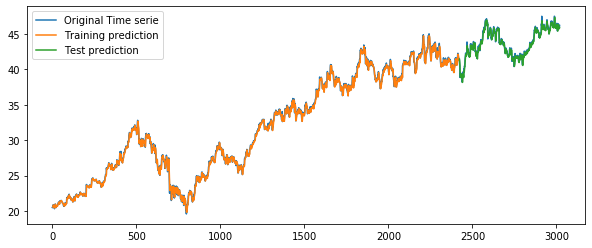

In [97]:
look_back = 3;
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)
#-----------------------------------------------------------------------
model5b = Sequential()
model5b.add(SimpleRNN(20,activation = 'relu',return_sequences=True,input_shape=(1,look_back)))
model5b.add(SimpleRNN(20,activation = 'relu'))
model5b.add(Dense(1))
#-----------------------------------------------------------------------------------------
model5b.compile(optimizer='adam',loss='mse')
model5b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=50, validation_split=0.10, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5b,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

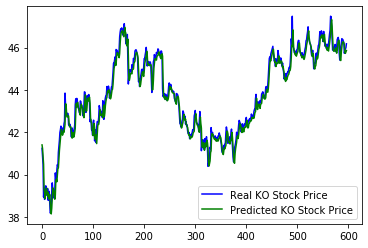

In [98]:
plt.plot(scaler.inverse_transform(y_test[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

**Option2**: Propagate the first layer and provide only the output of the last time step to the following layer:

In [14]:
look_back = 2;
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)

Train Score: 23.85 RMSE
Test Score: 51.97 RMSE
Train Score: 8.78 MAPE
Test Score: 10.55 MAPE
1


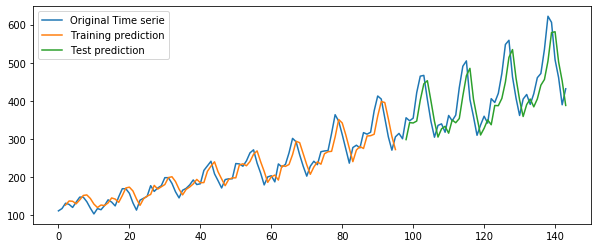

In [16]:
model5 = Sequential()
model5.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model5.add(RepeatVector(look_back))
model5.add(SimpleRNN(5,activation = 'relu'))
model5.add(Dense(1))
#-------------------------------------------------------------------------
model5.compile(optimizer='adam',loss='mse')
model5.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [55]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 5)                 40        
_________________________________________________________________
repeat_vector (RepeatVector) (None, 2, 5)              0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Train Score: 0.36 RMSE
Test Score: 0.85 RMSE
Train Score: 0.86 MAPE
Test Score: 1.48 MAPE
1


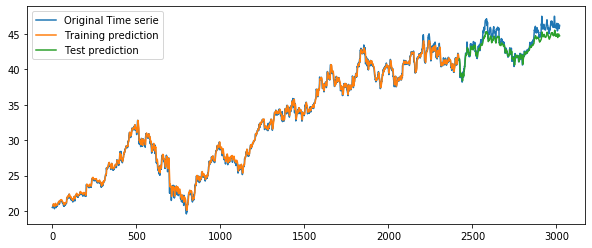

In [95]:
look_back = 3;
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)
#---------------------------------------------------------------------
model5 = Sequential()
model5.add(SimpleRNN(20,activation = 'relu',input_shape=(1,look_back)))
model5.add(RepeatVector(look_back))
model5.add(SimpleRNN(20,activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model5.add(Dense(1))
#----------------------------------------------------------------------
model5.compile(optimizer='adam',loss='mse')
model5.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=50, validation_split=0.10,verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

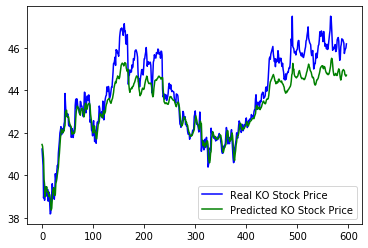

In [96]:
plt.plot(scaler.inverse_transform(y_test[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

# Predicting several times ahead

### Walk forward using a RNN

Train Score: 0.29 RMSE
Test Score: 0.71 RMSE
Train Score: 0.65 MAPE
Test Score: 1.24 MAPE
3


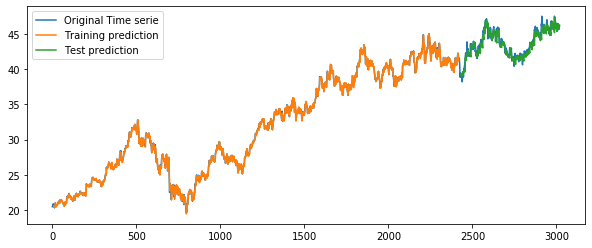

In [34]:
look_back = 10
time_ahead = 7
dataset = dataset1.values
dataset = dataset.astype('float32')

# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)

X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model6c = Sequential()
model6c.add(SimpleRNN(20,activation = 'relu',input_shape=(look_back,1)))
model6c.add(Dense(1))
model6c.compile(optimizer='adam',loss='mse')
model6c.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStep(model6c,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead,0)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

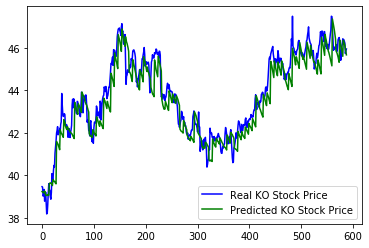

In [35]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

### A RNN network with multiple outputs

In [36]:
look_back = 10;
time_ahead = 7
dataset = dataset1.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)

X_train, y_train = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
print('Train',X_train[:10])
print('Test',y_train[:10])

Train [[0.03776747 0.03944606 0.04028529 0.04951739 0.05203521 0.05287451
  0.05455303 0.05119592 0.04951739 0.0436424 ]
 [0.05119592 0.04951739 0.0436424  0.03776747 0.04070497 0.03524965
  0.03063363 0.04196388 0.04196388 0.04993707]
 [0.04196388 0.04196388 0.04993707 0.05874944 0.05791014 0.05329418
  0.04909778 0.0486781  0.04280317 0.03776747]
 [0.0486781  0.04280317 0.03776747 0.04783881 0.0436424  0.0465799
  0.0465799  0.04574066 0.04699951 0.04699951]
 [0.04574066 0.04699951 0.04699951 0.0507763  0.05665129 0.05958873
  0.06210655 0.06546366 0.06588334 0.06966007]
 [0.06546366 0.06588334 0.06966007 0.07091904 0.06672263 0.06210655
  0.05958873 0.06294584 0.05958873 0.06966007]
 [0.06294584 0.05958873 0.06966007 0.07133859 0.07805282 0.075535
  0.07721359 0.07595462 0.07469571 0.07637429]
 [0.07595462 0.07469571 0.07637429 0.0797314  0.07679397 0.07889211
  0.07637429 0.07469571 0.07217789 0.06882077]
 [0.07469571 0.07217789 0.06882077 0.06630296 0.06420469 0.06294584
  0.06378

Train Score: 0.61 RMSE
Test Score: 0.72 RMSE
Train Score: 1.54 MAPE
Test Score: 1.26 MAPE
5


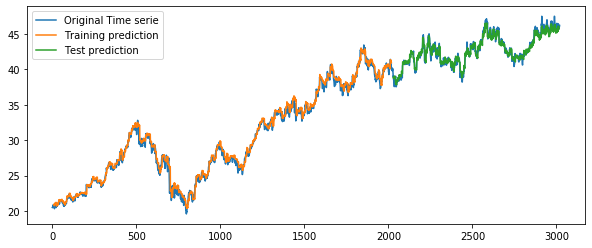

In [37]:
model7 = Sequential()
model7.add(SimpleRNN(20,activation = 'relu',input_shape=(look_back,1)))
model7.add(Dense(10))
model7.add(Dense(time_ahead))
model7.compile(optimizer='adam',loss='mse')
model7.fit(X_train2.reshape(X_train2.shape[0],look_back,1),y_train2,epochs=200, verbose=0)
#------------------------------------
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStepEncoDeco(model7,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

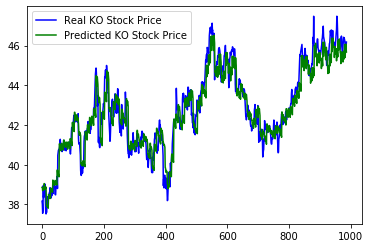

In [38]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

## Encoder-Decoder architecture (sequence-to-sequence)

Input: **[n_samples,3,1]**

Ouput: **[n_samples,3,1]**

Train Score: 0.56 RMSE
Test Score: 0.89 RMSE
Train Score: 1.28 MAPE
Test Score: 1.59 MAPE
5


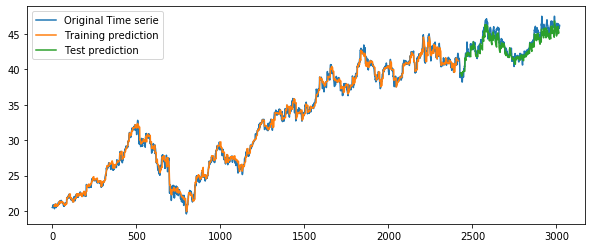

In [39]:
look_back = 10;
time_ahead = 7
dataset = dataset1.values
dataset = dataset.astype('float32')

# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)

X_train, y_train = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model8b = Sequential()
model8b.add(SimpleRNN(20,activation = 'relu',input_shape=(look_back,1)))
model8b.add(RepeatVector(time_ahead))
model8b.add(SimpleRNN(20,activation = 'relu',return_sequences=True))
model8b.add(TimeDistributed(Dense(1)))
model8b.compile(optimizer='adam',loss='mse')
model8b.fit(X_train2.reshape(X_train2.shape[0],look_back,1),y_train2.reshape(y_train2.shape[0],time_ahead,1),epochs=1000, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStepEncoDeco(model8b,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

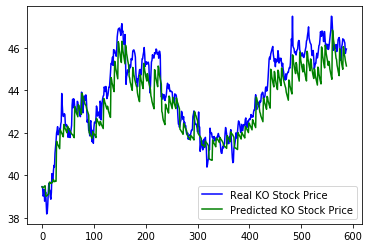

In [41]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

In [ ]:
many-to-one
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(look_back,1)))
model8.add(SimpleRNN(5,activation = 'relu'))
model8.add(Dense(1))

many-to-many
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(look_back,1)))
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True))
model8.add(TimeDistributeds(Dense(1)))

seq-to-seq
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model8.add(RepeatVector(repetitions))
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True))
model8.add(TimeDistributed(Dense(1)))